In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils


In [2]:
def convolve_im_freq(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    fft_image = np.fft.fft2(im)

    # Shift zero frequency to center
    fft_image_shifted = np.fft.fftshift(fft_image)
    fft_kernel_shifted = np.fft.fftshift(fft_kernel)
    
    # Apply the frequency domain filter through multiplication
    filtered_fft = fft_image_shifted * fft_kernel_shifted
    
    # Inverse shift
    filtered_fft_unshifted = np.fft.ifftshift(filtered_fft)
    
    # Compute the inverse FFT to get back to spatial domain
    conv_result = np.real(np.fft.ifft2(filtered_fft_unshifted))

    # conv_result = im
    
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title("Original Image")

        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.imshow(np.log1p(np.abs(fft_image_shifted)), cmap="gray")
        plt.title("FFT Image")
        
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(np.log1p(np.abs(fft_kernel_shifted)), cmap="gray") 
        plt.title("FFT Kernel")

        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.imshow(np.log1p(np.abs(filtered_fft)), cmap="gray")
        plt.title("Filtered FFT Image")

        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
        
        

    ### END YOUR CODE HERE ###
    return conv_result

NameError: name 'np' is not defined

In [4]:
def convolve_im_spatial(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    orig_im = im.copy()

    kernel_h, kernel_w = kernel.shape
    
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))

    # Padding
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    # Pad the image to handle borders
    im = np.pad(im, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Convert the kernel to frequency domain
    fft_kernel = np.fft.fft2(kernel, s=im.shape)
    
    fft_image = np.fft.fft2(im)

    # Same as convolve_im_freq
    # return convolve_im_freq(im, fft_kernel, verbose)
    fft_image_shifted = np.fft.fftshift(fft_image)
    fft_kernel_shifted = np.fft.fftshift(fft_kernel)
    
    # Apply the frequency domain filter through multiplication
    filtered_fft = fft_image_shifted * fft_kernel_shifted
    
    # Inverse shift
    filtered_fft_unshifted = np.fft.ifftshift(filtered_fft)
    
    # Compute the inverse FFT to get back to spatial domain
    conv_result = np.real(np.fft.ifft2(filtered_fft_unshifted))

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(orig_im, cmap="gray")
        plt.title("Original Image")

        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.imshow(np.log1p(np.abs(fft_image_shifted)), cmap="gray")
        plt.title("FFT Image")
        
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(np.log1p(np.abs(fft_kernel_shifted)), cmap="gray") 
        plt.title("FFT Kernel")

        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.imshow(np.log1p(np.abs(filtered_fft)), cmap="gray")
        plt.title("Filtered FFT Image")

        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
        
        

    ### END YOUR CODE HERE ###
    
    return conv_result

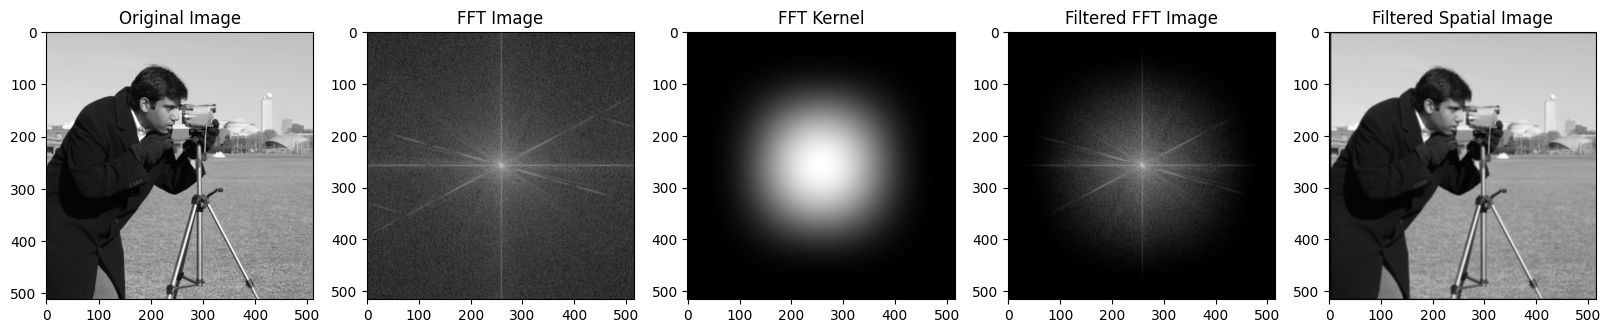

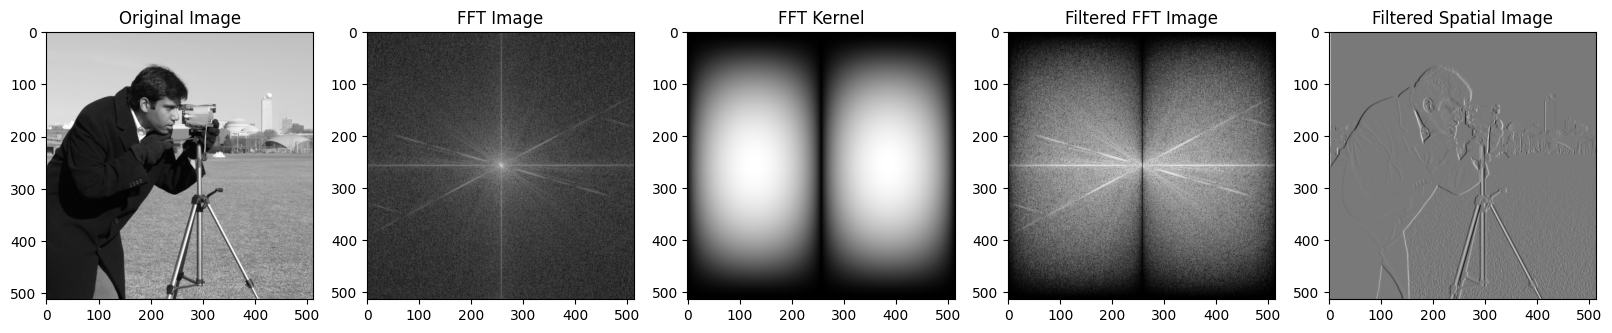

Saving image to: image_processed/camera_gaussian.png
Saving image to: image_processed/camera_sobelx.png


/home/nic/Documents/school/tdt4195/problem_sets/5/TDT4195-StarterCode-2024/Assignment 2/utils.py:27: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [5]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im_spatial(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im_spatial(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)

In [7]:
#Apply a filter and display the input/output images
def apply_filter(img, kernel, label='Output image', **kwargs):

    #apply filter to generate output
    output = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    #plot images
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    axs[0].imshow(img, cmap="gray")
    axs[0].set_axis_off()
    axs[0].set_title("Original image")

    axs[1].imshow(output, cmap="gray")
    axs[1].set_axis_off()
    axs[1].set_title(label)

    plt.show()

    return output